# Intro to Working with ICESat-2 Data
This notebook is aimed to help people get started looking at ICESat-2 data, and be a compilation of learning resources from scientists working with this dataset. 

The majority of learning resources featured in notebook come from the 2020 ICESat-2 Cryospheric Hackweek
2020 Hackweek Learning Resources GitHub: https://github.com/ICESAT-2HackWeek/learning-resources

### Authors
- Anna Valentine (annavalentine@mymail.mines.edu)
- Countless contributors of code from the Hackweek GitHub Repository



## ICESat-2 Mission: Satellite, Sensor, and Data
There's a lot of information out there to help us better understand the data we are looking at, and a quick google search of ICESat-2 will bring you a lot of information!

(Maybe a pic here) 


Some ICESat-2 websites to familiarize yourself with: 
- National Snow and Ice Data Center: https://nsidc.org/data/icesat-2 
- NASA:  https://icesat-2.gsfc.nasa.gov/

#### Hackweek Tutorial (~1hr) : https://www.youtube.com/watch?v=0guml7ihfdA 

In [8]:
from IPython.display import HTML

# Youtube
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/0guml7ihfdA" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

C:\Users\annav\anaconda3\lib\site-packages\IPython\core\display.py:701: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


## Common Tools

Most people working with this data will use these basic tools to organize code, analyze, etc.:
- Python 
- GitHub 
- Jupyter Notebook 
- EarthData Login 
- Icepyx

## So what are these tools anyway?


### Python 
Python is an interpreted, high-level, general-purpose programming language. It is the most commonly used language for looking at this kind of data, and the tools used to help with acessing/analyze data (captoolkit/icepyx) are written in python. It is also reccomended to use Anaconda, which is the recommended Python distribution, for installing and working with Python on your local computer. Conda is an open source package and environment management system for installing multiple versions of software packages, their dependencies and switching easily between them. While you can set up python without anaconda, conda makes it easier to install packages such as numpy, pandas, geopandas and other tools used in data analysis. 

 Finish putting instructions in here using website: https://icesat-2hackweek.github.io/learning-resources/preliminary/conda/ 

### GitHub/Git
Git is a popular version control system that is the foundation of most open source software development. GitHub is a hosting service for Git repositories, enabling us to share code across teams in a web environment. Once set-up, it's a good idea to ask your team if they have a GitHub team or repository that they will work from!

- Make a GitHub Account: https://github.com/ 

- Install Git: https://git-scm.com/

To get familiar with GitHub/Git in the context of ICESat-2 Data click on tutorial link below: 
#### Git/GitHub Tutorial: https://www.youtube.com/watch?v=O2lLC_s_d20&feature=youtu.be 

### Jupyter Notebook


### Earth Data

### Icepyx


## Acessing Data
This notebook aims to give a very simple look at acessing data, just an example to get you started! 
There are so many great in depth resources that will help you discover how to best do this, here is a list:
- 
- 
- 

In the meantime, to access + download new data you must first have a Earth Data login! 

In [9]:
#Some of the libraries we need to import
from icepyx import icesat2data as ipd
import os
import shutil
from pprint import pprint

# utility modules
import glob
import sys
import re

# the usual suspects:
import numpy as np
import matplotlib.pyplot as plt

# specialty modules
import h5py
import pyproj
%matplotlib inline

#Some setup code
path = './download'

In [10]:
#First, we need to define where we want to look:
# Pine Island Glacier
short_name = 'ATL06'                        #The data product, as described in data products chart 
spatial_extent = [-102, -76, -98, -74.5]    #Bounding box given in decimal degrees: lower left longitude, 
                                            #lower left latitude, upper right longitude, and upper right latitude.
date_range = ['2019-01-01','2019-03-25']    #Finally, our date range we want to look at 


region_a = ipd.Icesat2Data(short_name, spatial_extent, date_range)

earthdata_uid = 'annavalentine'
email = 'annavalentine@mymail.mines.edu'
region_a.earthdata_login(earthdata_uid, email)


Earthdata Login password: ········


In [15]:
# And now we are going to download our "granules", these will end up in your ./downloads path
#region_a.download_granules(path)

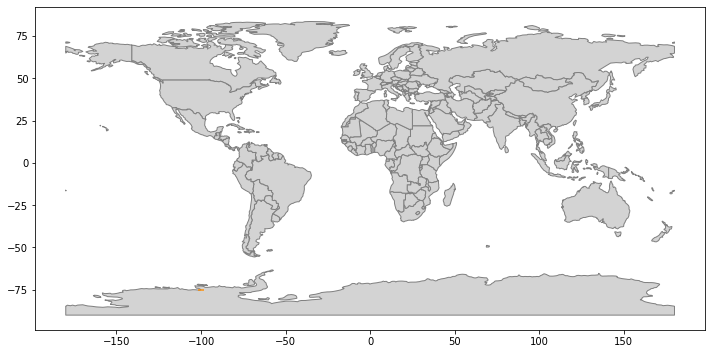

In [16]:
#Okay, but what am I even looking at? Let's use a tool from the icepyx library that easily allows us to see the spacial 
#extent of what we are looking at. Check out the lower left of map in orange!
region_a.visualize_spatial_extent() 

## HDF5
So now we have some data downloaded, but what is it?
We need to check out the metadata....



In [17]:
#ATL06 Reader:
def atl06_to_dict(filename, beam, field_dict=None, index=None, epsg=None):
    """
        Read selected datasets from an ATL06 file

        Input arguments:
            filename: ATl06 file to read
            beam: a string specifying which beam is to be read (ex: gt1l, gt1r, gt2l, etc)
            field_dict: A dictinary describing the fields to be read
                    keys give the group names to be read, 
                    entries are lists of datasets within the groups
            index: which entries in each field to read
            epsg: an EPSG code specifying a projection (see www.epsg.org).  Good choices are:
                for Greenland, 3413 (polar stereographic projection, with Greenland along the Y axis)
                for Antarctica, 3031 (polar stereographic projection, centered on the Pouth Pole)
        Output argument:
            D6: dictionary containing ATL06 data.  Each dataset in 
                dataset_dict has its own entry in D6.  Each dataset 
                in D6 contains a numpy array containing the 
                data
    """
    if field_dict is None:
        field_dict={None:['latitude','longitude','h_li', 'atl06_quality_summary'],\
                    'ground_track':['x_atc','y_atc'],\
                    'fit_statistics':['dh_fit_dx', 'dh_fit_dy']}
    D={}
    file_re=re.compile('ATL06_(?P<date>\d+)_(?P<rgt>\d\d\d\d)(?P<cycle>\d\d)(?P<region>\d\d)_(?P<release>\d\d\d)_(?P<version>\d\d).h5')
    with h5py.File(filename,'r') as h5f:
        for key in field_dict:
            for ds in field_dict[key]:
                if key is not None:
                    ds_name=beam+'/land_ice_segments/'+key+'/'+ds
                else:
                    ds_name=beam+'/land_ice_segments/'+ds
                if index is not None:
                    D[ds]=np.array(h5f[ds_name][index])
                else:
                    D[ds]=np.array(h5f[ds_name])
                if '_FillValue' in h5f[ds_name].attrs:
                    bad_vals=D[ds]==h5f[ds_name].attrs['_FillValue']
                    D[ds]=D[ds].astype(float)
                    D[ds][bad_vals]=np.NaN
    if epsg is not None:
        xy=np.array(pyproj.proj.Proj(epsg)(D['longitude'], D['latitude']))
        D['x']=xy[0,:].reshape(D['latitude'].shape)
        D['y']=xy[1,:].reshape(D['latitude'].shape)
    temp=file_re.search(filename)
    D['rgt']=int(temp['rgt'])
    D['cycle']=int(temp['cycle'])
    D['beam']=beam
    return D

## Quick Visualizations of Data
For looking at data quickly, and simply we need to start thinking about what metadata we have....polar stereograph...matplotlib...etc
See this notebook

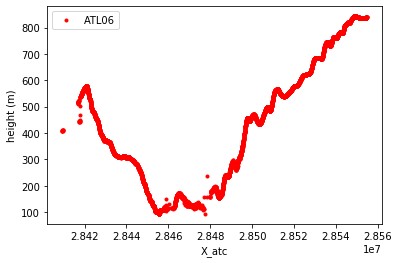

In [18]:
path = './download/*.h5'

ATL06_files = glob.glob(path)

#Let's look at just one file first
D6=atl06_to_dict(ATL06_files[1],'/gt1l', index=None, epsg=3031)

# We are going to plot the elevations! 
fig=plt.figure(figsize=(6,4))
ax = fig.add_subplot(111)
ax.plot(D6['x_atc'], D6['h_li'],'r.', label='ATL06')
ax.set_xlabel("X_atc")
ax.set_ylabel("height (m)")
ax.legend();

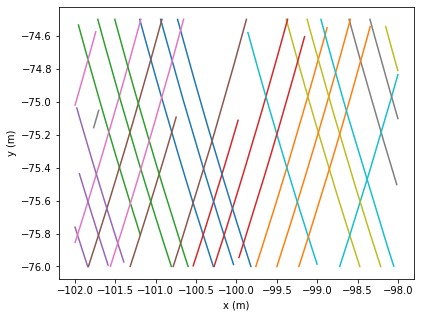

In [58]:
#Okay, how about if we look at multiple files at once, by plotting just long and lat, we can see their crossovers!
import TK2
fig = plt.figure(figsize=(14,5))
ax1 = plt.subplot(121)

ATL06_files = glob.glob(path)

for fname in ATL06_files:
    
    D7 = atl06_to_dict(fname,'/gt2l', index=None, epsg=3031)

    lat = D7['latitude']
    lon = D7['longitude']
 
    ax1.plot(lon, lat)
   
    
ax1.set_xlabel('x (m)')
ax1.set_ylabel('y (m)')
#ax1.legend()
plt.show();

## Next Steps in Learning: 
- Maybe link to some "higher level" topics the icepyx toolkit, captoolkit, other repositories etc. 